In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

house_price_train = [240,260,360,420,350,285]
size_train = [1200,1400,2600,2700,2400,1450]

size_test = [1400, 1600, 2000, 2400, 2600, 2200]
house_test = [250, 270, 289, 320, 400, 319]

#Reshape into numpy arrays
size_train2 = np.array(size_train).reshape((-1,1))
size_test2 = np.array(size_test).reshape((-1,1))

#Feature scaling- mean normalization
size_norm = (size_train - np.mean(size_train)) / np.ptp(size_train)
size_norm_test = (size_test - np.mean(size_test)) / np.ptp(size_test)
size_norm2 = np.array(size_norm).reshape((-1,1))
size_norm_test2 = np.array(size_norm_test).reshape((-1,1))

In [2]:
#Fit parameters for non-scaled thetas
regr = linear_model.LinearRegression()
regr.fit(size_train2,house_price_train)
print('Without feature scaling:')
print(f'Coeffecient: {regr.coef_}, Intercept: {regr.intercept_}')

Without feature scaling:
Coeffecient: [0.09775566], Intercept: 127.72850678733033


In [3]:
#Fit parameters for scaled thetas
regr2 = linear_model.LinearRegression()
regr2.fit(size_norm2, house_price_train)
print('With feature scaling:')
print(f'Coeffecient: {regr2.coef_}, Intercept: {regr2.intercept_}')

With feature scaling:
Coeffecient: [146.63348416], Intercept: 319.1666666666667


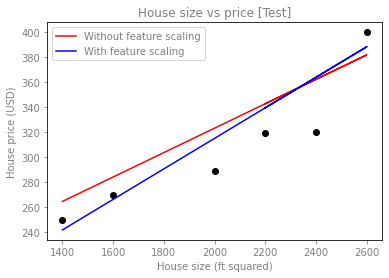

In [4]:
#Graph test set
COLOR = 'grey'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

notscaled, = plt.plot(size_test, regr.predict(size_test2),'r-', label= 'Without feature scaling')
scaled, = plt.plot(size_test, regr2.predict(size_norm_test2),'b-', label = 'With feature scaling')
plt.scatter(size_test, house_test, color='black')
plt.title('House size vs price [Test]')
plt.xlabel('House size (ft squared)')
plt.ylabel('House price (USD)');
plt.legend(handles = [notscaled, scaled]);

In [5]:
#Get error values for both models
print('r-squared without scaling', r2_score(house_test, regr.predict(size_test2)))
print('r-squared with scaling', r2_score(house_test, regr2.predict(size_norm_test2)))

r-squared without scaling 0.6926380460065906
r-squared with scaling 0.7659954154041286
